In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
books = pd.read_csv('books_enriched.csv')

In [3]:
print(ratings.shape)
ratings.head()

(5976479, 3)


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [4]:
print(tags.shape)
tags.head()

(34252, 2)


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [5]:
print(books.shape)
print(books.columns)
books.head()

(10000, 30)
Index(['Unnamed: 0', 'index', 'authors', 'average_rating', 'best_book_id',
       'book_id', 'books_count', 'description', 'genres', 'goodreads_book_id',
       'image_url', 'isbn', 'isbn13', 'language_code',
       'original_publication_year', 'original_title', 'pages', 'publishDate',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'ratings_count', 'small_image_url', 'title', 'work_id',
       'work_ratings_count', 'work_text_reviews_count', 'authors_2'],
      dtype='object')


,Unnamed: 0,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,...,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2
0,0,0,['Suzanne Collins'],4.34,2767052,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['young-adult', 'fiction', 'fantasy', 'science...",2767052,...,560092,1481305,2706317,4780653,https://images.gr-assets.com/books/1447303603s...,"The Hunger Games (The Hunger Games, #1)",2792775,4942365,155254,['Suzanne Collins']
1,1,1,"['J.K. Rowling', 'Mary GrandPré']",4.44,3,2,491,Harry Potter's life is miserable. His parents ...,"['fantasy', 'fiction', 'young-adult', 'classics']",3,...,455024,1156318,3011543,4602479,https://images.gr-assets.com/books/1474154022s...,Harry Potter and the Sorcerer's Stone (Harry P...,4640799,4800065,75867,"['J.K. Rowling', 'Mary GrandPré']"
2,2,2,['Stephenie Meyer'],3.57,41865,3,226,About three things I was absolutely positive.\...,"['young-adult', 'fantasy', 'romance', 'fiction...",41865,...,793319,875073,1355439,3866839,https://images.gr-assets.com/books/1361039443s...,"Twilight (Twilight, #1)",3212258,3916824,95009,['Stephenie Meyer']
3,3,3,['Harper Lee'],4.25,2657,4,487,The unforgettable novel of a childhood in a sl...,"['classics', 'fiction', 'historical-fiction', ...",2657,...,446835,1001952,1714267,3198671,https://images.gr-assets.com/books/1361975680s...,To Kill a Mockingbird,3275794,3340896,72586,['Harper Lee']
4,4,4,['F. Scott Fitzgerald'],3.89,4671,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['classics', 'fiction', 'historical-fiction', ...",4671,...,606158,936012,947718,2683664,https://images.gr-assets.com/books/1490528560s...,The Great Gatsby,245494,2773745,51992,['F. Scott Fitzgerald']


In [6]:
books['Total reviews'] = books['ratings_1'] + books['ratings_2'] + books['ratings_3'] + books['ratings_4'] + books['ratings_5']

In [61]:
no_ratings = books.groupby('original_title')[['Total reviews','ratings_1','ratings_2','ratings_3','ratings_4','ratings_5']]\
                                .sum().sort_values(by = 'Total reviews', ascending = False)[0:20]

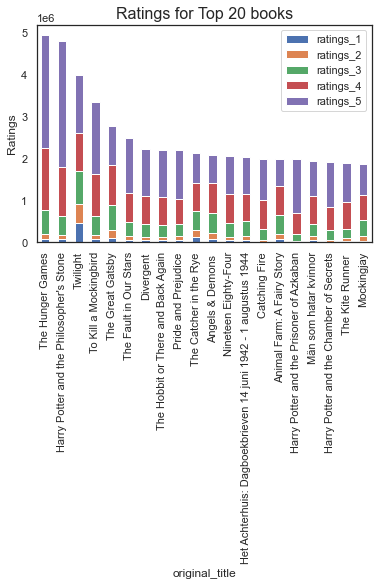

In [8]:
sns.set(style='white')
no_ratings[['ratings_1','ratings_2','ratings_3','ratings_4','ratings_5']].plot(kind='bar', stacked=True)
plt.title('Ratings for Top 20 books', fontsize=16)
plt.ylabel('Ratings')
plt.show()

Most top books have a lot of 5 & 4 star ratings, Twilight very polarizing

In [9]:
import re
books['Top Genre'] = books['genres'].apply(lambda x: re.findall('^\[\'([A-z-]+)',x)[0])

In [10]:
genre_ratings = books.groupby('Top Genre')\
.agg({'Total reviews':'sum','ratings_1':'sum','ratings_2':'sum','ratings_3':'sum','ratings_4':'sum','ratings_5':'sum'\
      ,'average_rating':'mean'})\
                                .sort_values(by = 'Total reviews', ascending = False)[0:10]

In [11]:
genre_ratings

,Total reviews,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,average_rating
Top Genre,,,,,,,
fiction,123371977,2933397,7389447,26339932,43458625,43250576,3.894149
fantasy,104696252,1540908,3817823,16302862,33326637,49708022,4.104854
classics,83650342,2199120,5039922,17275430,27557589,31578281,3.957643
young-adult,76663066,2343382,4740304,14812318,23655128,31111934,3.967103
nonfiction,37063072,904938,1912489,7227666,13025100,13992879,3.994548
romance,32753456,843559,1625599,5659743,10389988,14234567,4.089928
mystery,25149799,330131,1047886,5498663,9804860,8468259,3.989868
historical-fiction,21716050,363336,969593,3983889,7794479,8604753,3.998805
science-fiction,16276979,247699,707656,3001176,5864002,6456446,4.007595


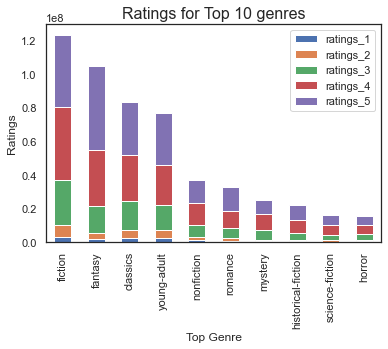

In [12]:
sns.set(style='white')
genre_ratings[['ratings_1','ratings_2','ratings_3','ratings_4','ratings_5']].plot(kind='bar', stacked=True)
plt.title('Ratings for Top 10 genres', fontsize=16)
plt.ylabel('Ratings')
plt.show()

Dominated by fiction, fantasy, classics & young-adult books. Huge drop off after big 4

In [13]:
year_ratings = books[books['original_publication_year']>0].groupby('original_publication_year')\
.agg({'average_rating':['mean','count']})
year_ratings.columns = year_ratings.columns.droplevel()
year_ratings = year_ratings[year_ratings.index > 1900]

<AxesSubplot:xlabel='original_publication_year', ylabel='Percent'>

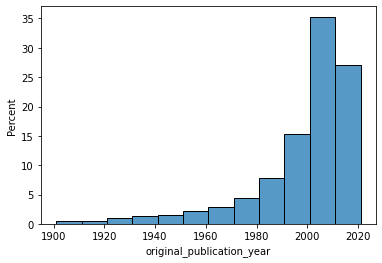

In [7]:
sns.histplot(books.loc[books['original_publication_year'] > 1900, 'original_publication_year'], binwidth = 10, stat = 'percent')

<AxesSubplot:xlabel='original_publication_year', ylabel='mean'>

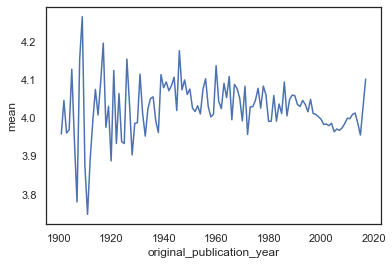

In [15]:
sns.lineplot(x = year_ratings.index, y = year_ratings['mean'])

<AxesSubplot:>

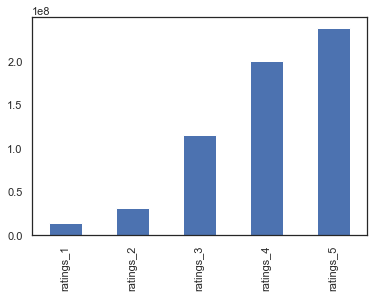

In [16]:
books[['ratings_1','ratings_2','ratings_3','ratings_4','ratings_5']].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='average_rating', ylabel='Count'>

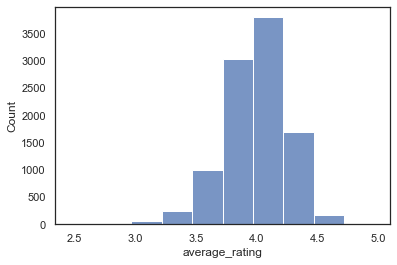

In [17]:
sns.histplot(x = 'average_rating', binwidth = 0.25, data = books)

<AxesSubplot:xlabel='pages', ylabel='Count'>

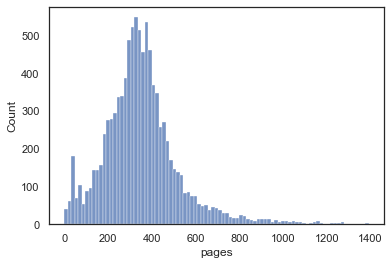

In [18]:
sns.histplot(x = 'pages', data = books[books['pages']<1400])

<AxesSubplot:xlabel='Pages Binned', ylabel='average_rating'>

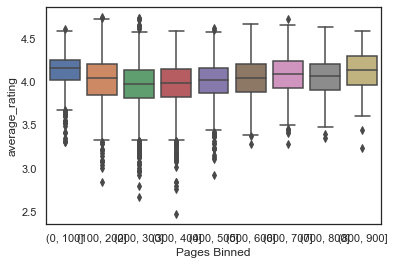

In [19]:
books['Pages Binned'] = pd.cut(books.loc[(books['pages'] < 1000) & (books['pages'] > 0), 'pages'], bins = range(0,1000,100))
sns.boxplot(x = 'Pages Binned', y ='average_rating', data = books)

<AxesSubplot:ylabel='Frequency'>

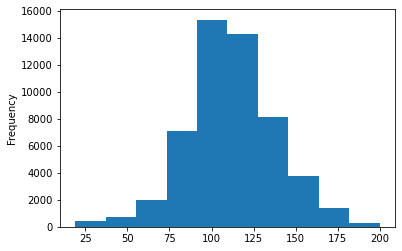

In [8]:
pd.Series(ratings.groupby('user_id')['rating'].count().sort_values(ascending = False).values).plot.hist(bins = 10)

In [10]:
pd.Series(ratings.groupby('user_id')['rating'].count()).describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: rating, dtype: float64

Most users have rated between 75-150 times

<AxesSubplot:ylabel='Frequency'>

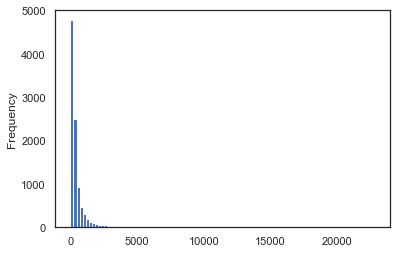

In [59]:
pd.Series(ratings.groupby('book_id')['rating'].count().sort_values(ascending = False).values).plot.hist(bins = 100)

Most books rated few number of times, very few books rated a lot of times

In [54]:
user_rate = ratings.groupby('user_id').agg({'rating':{'count', 'mean'}})
user_rate.columns = user_rate.columns.droplevel()
user_rate.corr()

,mean,count
mean,1.000000,-0.082534
count,-0.082534,1.000000


No relation between # of ratings given vs avg rating